In [130]:
%matplotlib inline
import networkx as nx
import math
import random
from collections import defaultdict
from matplotlib import pyplot as plt

In [131]:
class Node():
    pass

class Input(Node):
    pass
    
class Parameter(Node):
    pass

class Sum(Node):
    def __call__(self, values):
        return sum(values)

    def derivative(self, value, activation):
        return 1
    
class Multiply(Node):
    def __call__(self, values):
        result = 1
        for val in values:
            result *= val
        return result
    
    def derivative(self, value, activation):
        return activation / value
    
    
class Loss(Node):
    def __init__(self, expected_value):
        self.expected = expected_value
    
    def __call__(self, values):
        return (sum(values) - self.expected)**2
    
    def derivative(self, value, activation):
        return 2 * activation

Create the architecture

In [132]:
G = nx.DiGraph()

G.add_node('x0', kind=Input(), value=5)
G.add_node('x1', kind=Input(), value=7)
G.add_node('w0', kind=Parameter(), value=0.1)
G.add_node('w1', kind=Parameter(), value=-0.1)

G.add_node('mult0', kind=Multiply())
G.add_edge('x0', 'mult0')
G.add_edge('w0', 'mult0')

G.add_node('mult1', kind=Multiply())
G.add_edge('x1', 'mult1')
G.add_edge('w1', 'mult1')

G.add_node('sum', kind=Sum())
G.add_edge('mult0', 'sum')
G.add_edge('mult1', 'sum')

G.add_node('loss', kind=Loss(17))
G.add_edge('sum', 'loss')

/Users/anders/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


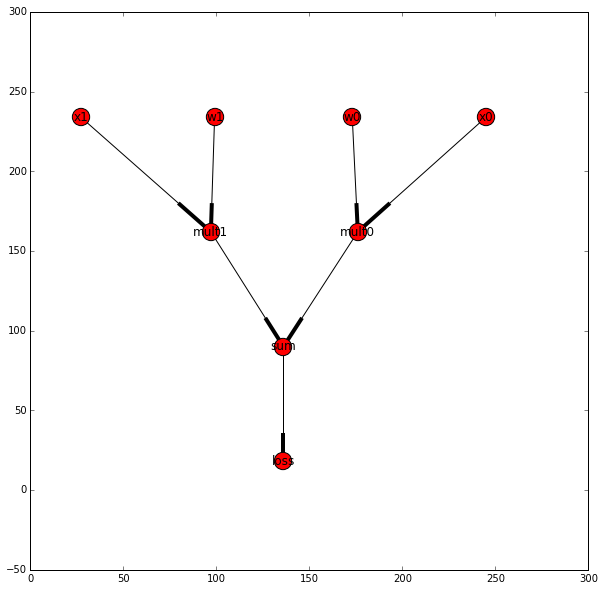

In [133]:
fig, ax = plt.subplots(figsize=(10,10))

layout = nx.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos=layout, ax=ax)

In [134]:
for i in range(5000):
    # Forward pass
    for v in nx.topological_sort(G):
        inputs = [G.node[u]['value'] for u in G.predecessors(v)]
        if inputs:
            G.node[v]['value'] = G.node[v]['kind'](inputs)

    # Backward pass
    for n in G.nodes():
        G.node[n]['grad'] = 0
    G.node['loss']['grad'] = 1

    for v in nx.topological_sort(G, reverse=True):
        for u in G.predecessors(v):
            derivative_u_wrt_v = G.node[v]['kind'].derivative(G.node[u]['value'], G.node[v]['value'])
            derivative_v_wrt_F = G.node[v]['grad']
            G.node[u]['grad'] += derivative_u_wrt_v * derivative_v_wrt_F

    print(G.node['loss']['value'])
    
    # Update parameters
    for n in G.nodes():
        if n.startswith('w'):
           G.node[n]['value'] += 0.0001 * G.node[n]['grad']


295.84
164.39260597862403
107.92212550791389
77.2871310589385
58.48365109459615
45.99420013771977
37.22449789218683
30.805448977434917
25.952351207437825
22.18645717785629
19.20096574143632
16.791279410797085
14.816382442825445
13.176340767473334
11.798628186948552
10.629513245681908
9.628463987100666
8.764414394696612
8.013213689155267
7.355846964775263
6.777170554792534
6.264998043912291
5.809429626613029
5.402353205979964
5.037068564097805
4.708000967156482
4.410480599659634
4.140571027687365
3.8949345789693117
3.670725802144028
3.4655064848968533
3.277177370410847
3.1039229137351896
2.9441662995841997
2.796532593455247
2.659818383107835
2.5329666324915987
2.4150457471236533
2.305232061592103
2.202795122848585
2.107085269311018
2.017523104400638
1.933590540556747
1.8548231509180946
1.7808036144226467
1.7111560788526547
1.6455412974705677
1.5836524199857218
1.525211338923289
1.4699655090124921
1.4176851707328189
1.3681609202534821
1.3212015771425079
1.2766323087813058
1.2342929766941

In [135]:
G.node['w1']

{'grad': 0.002546173760286905,
 'kind': <__main__.Parameter at 0x109f98a58>,
 'value': 1.525751588206521}